# Excelデータから作図

九州各県の人口推移をまとめたexcelから、円グラフを作図

In [1]:
import pandas
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
plt.rcParams['font.size'] = 28

In [3]:
def drawPi(df:pandas.DataFrame,year:list[int],size:int):
    xsize = size * len(year)
    fig, ax = plt.subplots(1, len(year), figsize=(xsize, size),
            facecolor = 'w')
    plt.suptitle('九州の人口')
    #各県のデータをプロット
    for i,y in enumerate(year):
        ser = df[y]
        #Seriesの名前を消去：消さないと左に小さく表示されてしまう
        ser.name = '' 
        ser.plot.pie(ax = ax[i], startangle = 90, 
            counterclock = False, autopct = '%1.2f%%', title = str(y))

    plt.savefig('KyushuPopulationPie.pdf')
    plt.show()

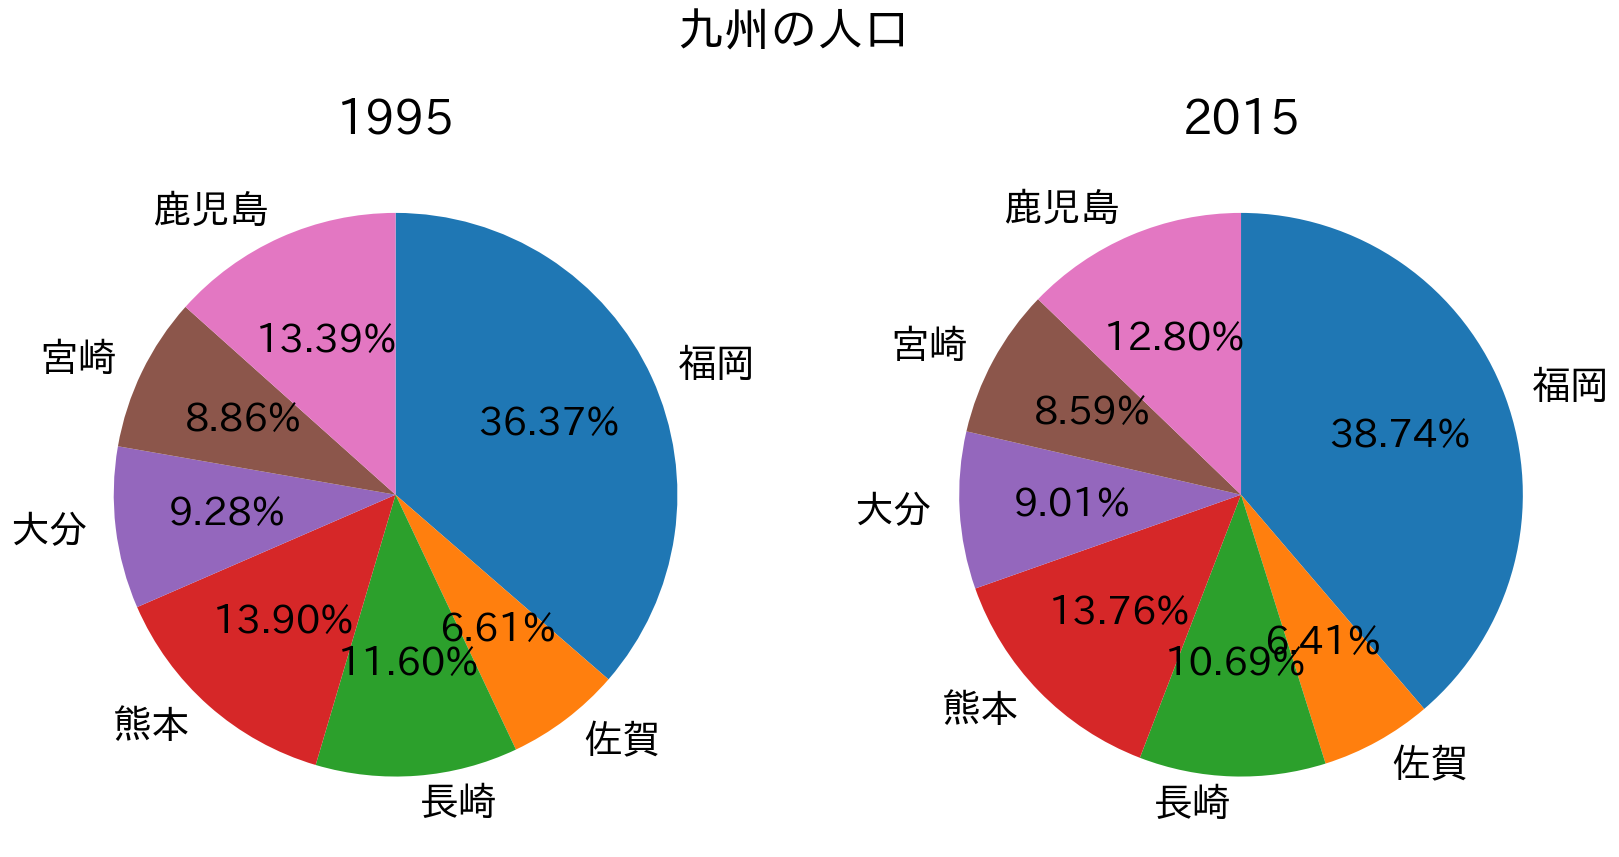

In [4]:
filename = 'KyushuPopulation.xlsx'
with pandas.ExcelFile(filename) as f:
    df = pandas.read_excel(f)
df.set_index('県', inplace = True) #左端のカラムにインデクスを設定
   
#図の準備
year = [1995, 2015]
size = 10
drawPi(df,year,size)